# Kopp et al 2021 Evaluation 
**Authorship:**
Adam Klie, *08/12/2022*
***
**Description:**
Notebook to perform a brief evaluation of trained models on the Kopp21 et al dataset.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


In [2]:
# Configure EUGENe 
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/kopp21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/kopp21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/kopp21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/kopp21"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/kopp21"
eu.settings.verbosity = logging.ERROR

# Load in the test `SeqData`(s)

In [3]:
# Load in the training data that's been predicted on
sdata_test = eu.dl.read_h5sd(
    filename=os.path.join(eu.settings.output_dir, "test_predictions.h5sd")
)
sdata_test

SeqData object with = 64309 seqs
seqs = (64309,)
names = (64309,)
rev_seqs = None
ohe_seqs = (64309, 4, 500)
ohe_rev_seqs = (64309, 4, 500)
seqs_annot: 'Kopp21CNN_trial_1_target_predictions', 'Kopp21CNN_trial_2_target_predictions', 'Kopp21CNN_trial_3_target_predictions', 'Kopp21CNN_trial_4_target_predictions', 'Kopp21CNN_trial_5_target_predictions', 'chr', 'dsCNN_trial_1_target_predictions', 'dsCNN_trial_2_target_predictions', 'dsCNN_trial_3_target_predictions', 'dsCNN_trial_4_target_predictions', 'dsCNN_trial_5_target_predictions', 'dsFCN_trial_1_target_predictions', 'dsFCN_trial_2_target_predictions', 'dsFCN_trial_3_target_predictions', 'dsFCN_trial_4_target_predictions', 'dsFCN_trial_5_target_predictions', 'dsHybrid_trial_1_target_predictions', 'dsHybrid_trial_2_target_predictions', 'dsHybrid_trial_3_target_predictions', 'dsHybrid_trial_4_target_predictions', 'dsHybrid_trial_5_target_predictions', 'end', 'start', 'target', 'train_test'
pos_annot: None
seqsm: None
uns: None

# Generate performance figures

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


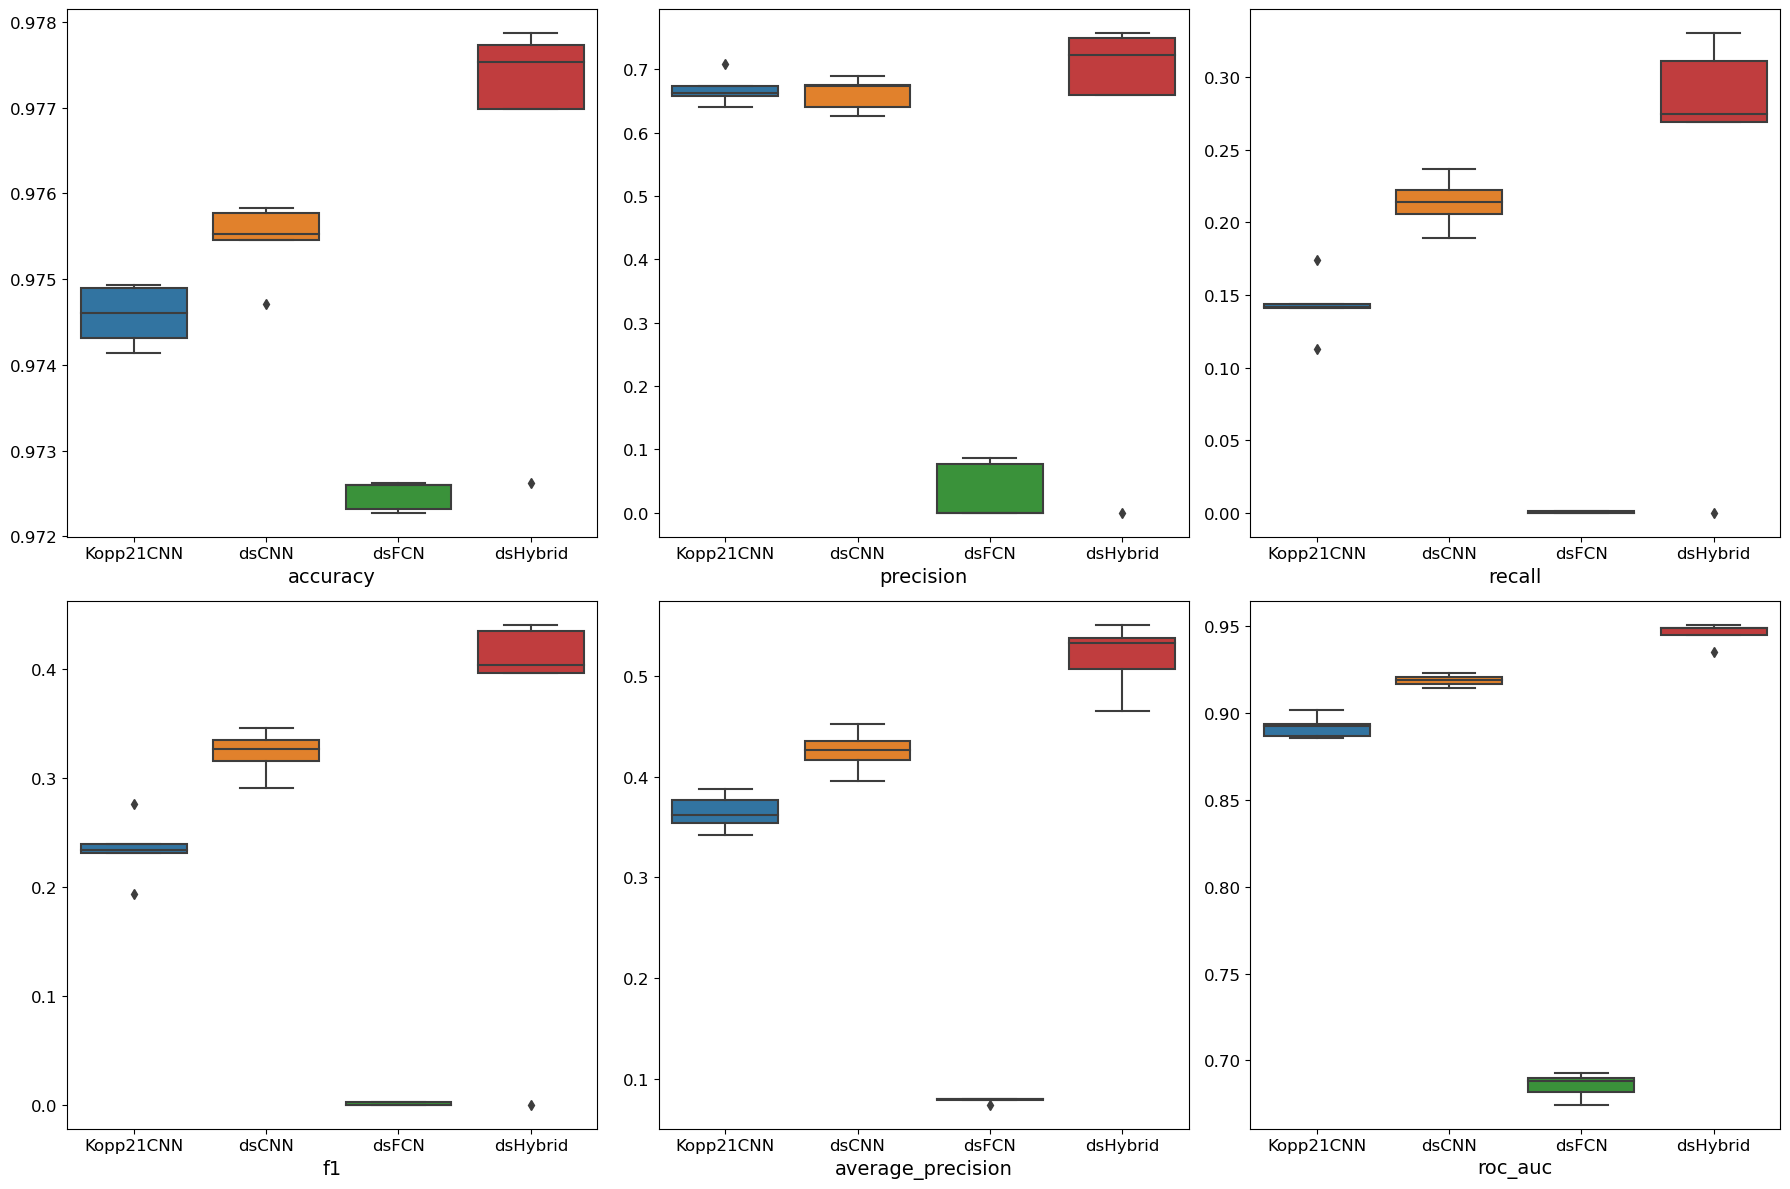

In [7]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_test,
    target="target",
    prediction_groups=["Kopp21CNN"]*5 + ["dsCNN"]*5 + ["dsFCN"]*5 + ["dsHybrid"]*5, 
    metrics=["accuracy", "precision", "recall", "f1", "average_precision", "roc_auc"],
    figsize=(6, 6)
)
#plt.savefig(os.path.join(figure_dir, "performance_summary.png"))
plt.show()

<AxesSubplot:ylabel='auPRC'>

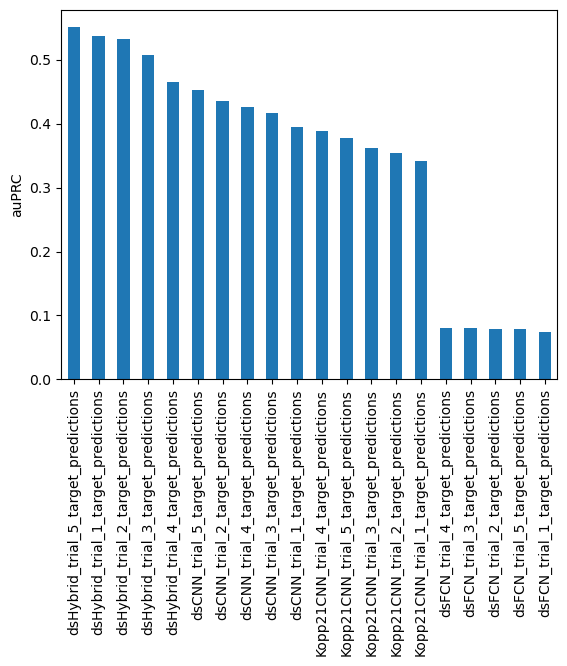

In [8]:
# Identify the best model from returned model scores
auprc_sorted = model_scores["average_precision"].sort_values(ascending=False)
auprc_sorted.plot(kind="bar", ylabel="auPRC")

In [13]:
model_scores["model_type"] = [model.split("_")[0] for model in model_scores.index]

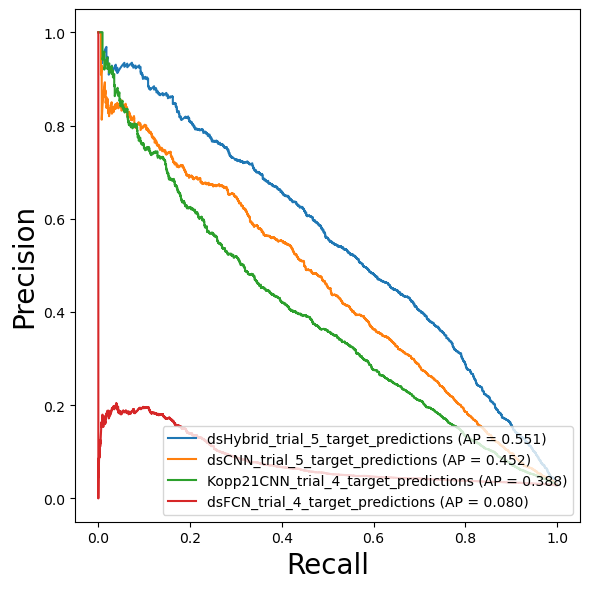

In [19]:
# Plot the performances across species for the best model
best_preds = model_scores.sort_values(by="average_precision", ascending=False).groupby("model_type").head(1).index
eu.pl.auprc(
    sdata_test,
    targets=["target"]*4, 
    predictions=best_preds,
    labels=best_preds,
    save=os.path.join(eu.settings.figure_dir, "best_model_auprc.pdf")
)
plt.show()

---

# Scratch